In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

More tutorials on opencv can be found:

https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [2]:
path = "tetris_blocks.png"

# Image input and initial processing
Load the input image (whose path was supplied via command line argument) and display the image to our screen:

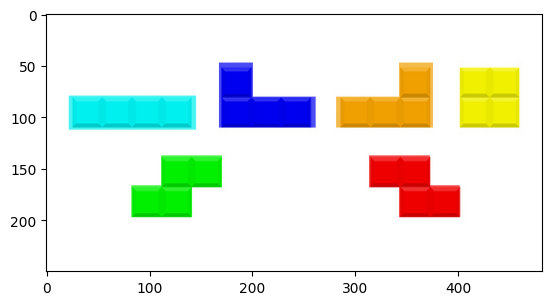

In [3]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

Convert the image to grayscale:

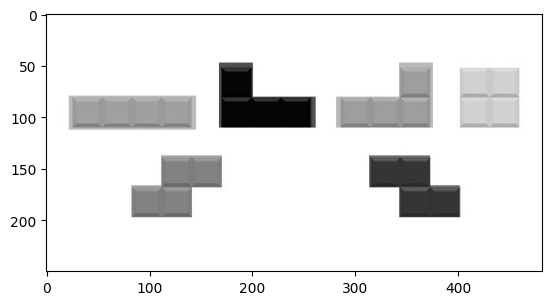

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

# Advanced processing
Apply edge detection, so we can find the outlines of objects in images:


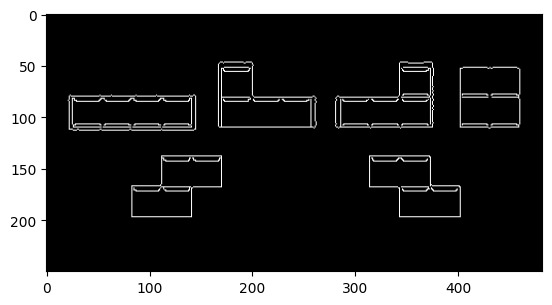

In [5]:
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

Threshold the image by setting all pixel values equal to or less than 225 to 255 (white; foreground): $x \le 225 \rightarrow x = 255$ and all pixel values greater than 225 to 0 (black; background): $x \gt 225 \rightarrow x=0$

Thereby we are segmenting the image.

Both the threshold (e.g. 225 in our case) and the value for pixels less than the threshold in the resulting image (255 in our case) can be tweaked.

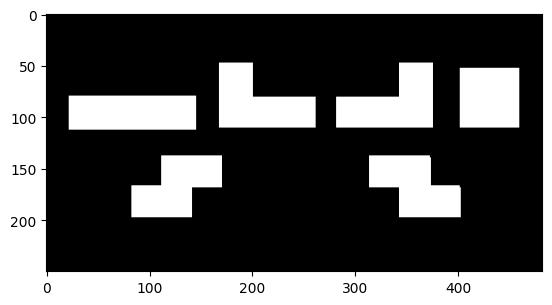

In [6]:
threshold = 225
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

Find contours (i.e., outlines) of the foreground objects in the thresholded image:

In [7]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

Loop over the contours:

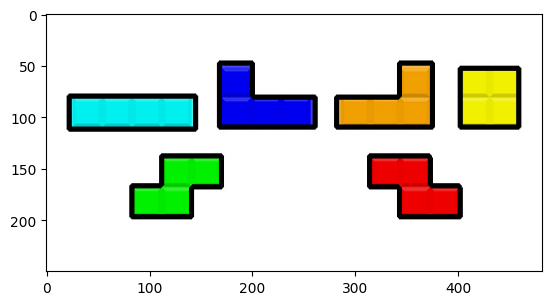

In [8]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)

Draw the total number of contours found in purple:

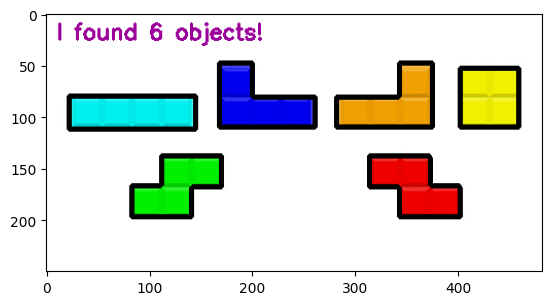

In [9]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

We apply erosions to reduce the size of foreground objects:

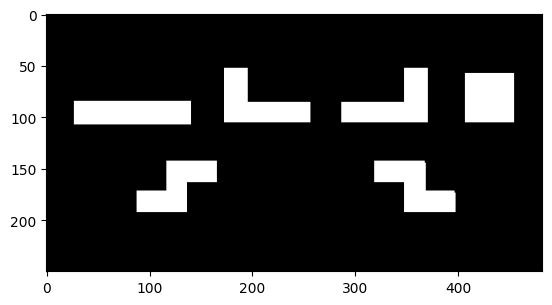

In [10]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')

Similarly, dilations can increase the size of the ground objects:

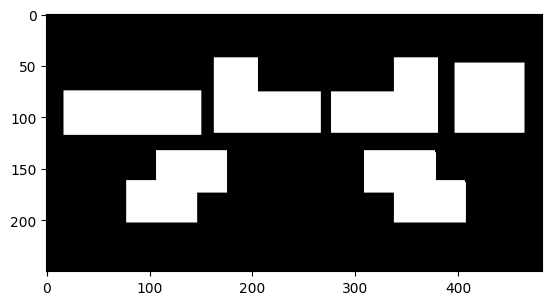

In [11]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

A typical operation we may want to apply is to take our mask and apply a bitwise `AND` to our input image, keeping only the masked regions:

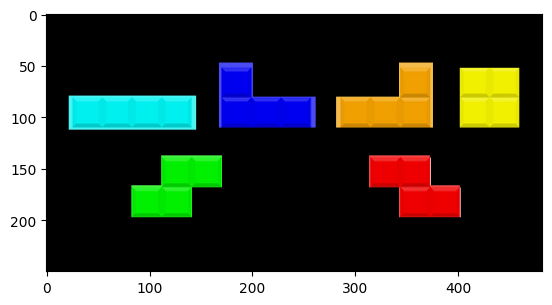

In [12]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

# Exercise 2
1. Can you remove the yellow square from the image?
2. Go through the tutoria, but with the `spheres.png` image. (replace `tetris_blocks.png` with `spheres.png`)
3. Tweak the parameters of the thresholding. Can you threshold all the spheres?
4. Can you remove the red sphere?
5. Can you remove the green sphere?

## Task 1 - Can you remove the yellow square from the image?

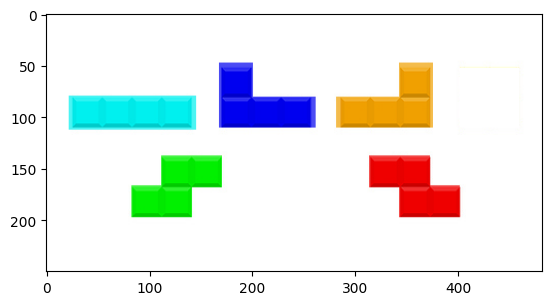

In [13]:
# Convert image to HSV color space to isolate yellow
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for yellow color in HSV
lower_yellow = np.array([70, 180, 180])
upper_yellow = np.array([95, 255, 255])

# Create a mask for yellow regions
yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Create a copy of the original image to modify
output_white_yellow = image.copy()

# Set yellow regions to white (255,255,255)
output_white_yellow[yellow_mask > 0] = [255, 255, 255]

# Show the result
plt.imshow(output_white_yellow)


## Task 2 - Replace `tetris_blocks.png` with `spheres.png`

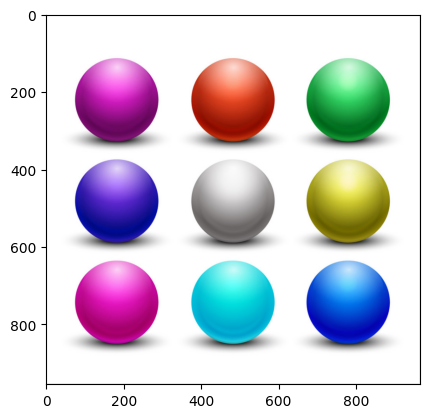

In [14]:
path = "spheres.png"
image = cv2.imread(path)
plt.imshow(image)

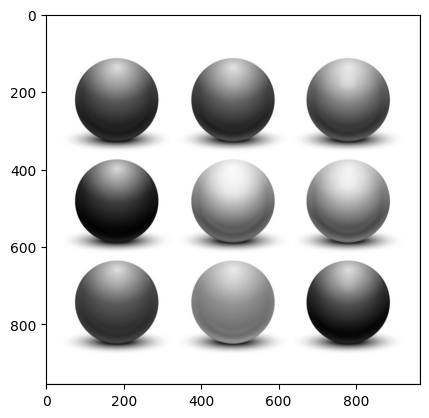

In [15]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

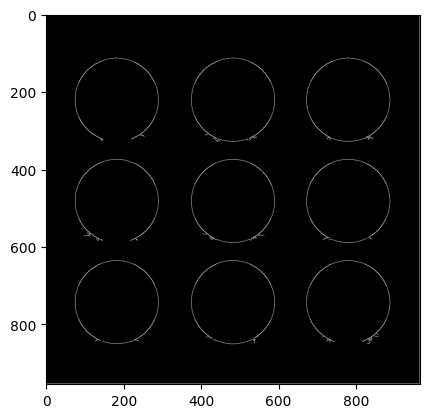

In [16]:
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap="gray")

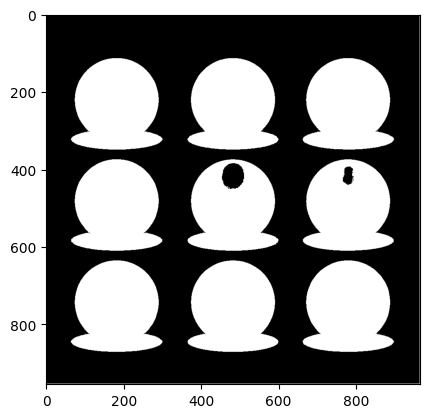

In [31]:
thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap="gray")

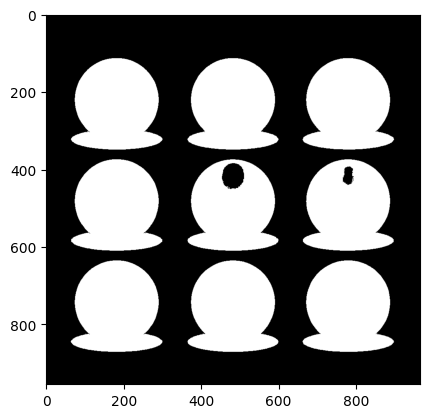

In [32]:
# Make the outer 1 pixels of the frame black
# Set the first and last rows to black
thresh[0, :] = 0
thresh[-1, :] = 0
# Set the first and last columns to black
thresh[:, 0] = 0
thresh[:, -1] = 0
plt.imshow(thresh, cmap="gray")


In [33]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

9


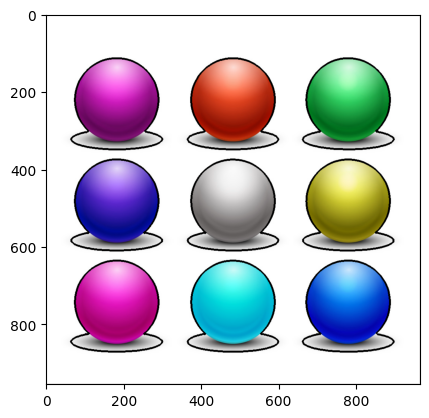

In [ ]:
print(len(cnts))
for c in cnts:
    cv2.drawContours(output, [c], -1, (0,0,0), 3)

plt.imshow(output)

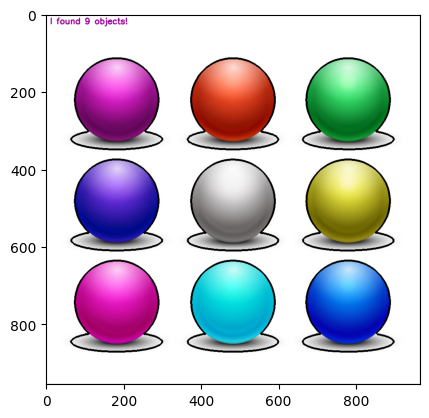

In [35]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

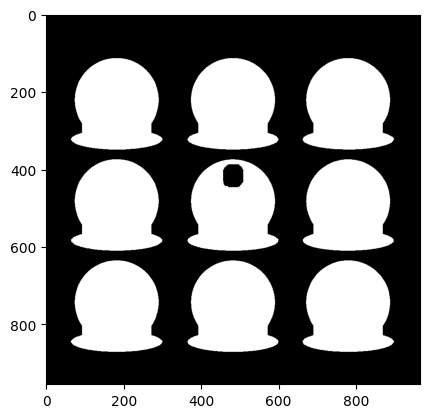

In [64]:
mask = thresh.copy()
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((25,25), np.uint8))
plt.imshow(mask, cmap='gray')

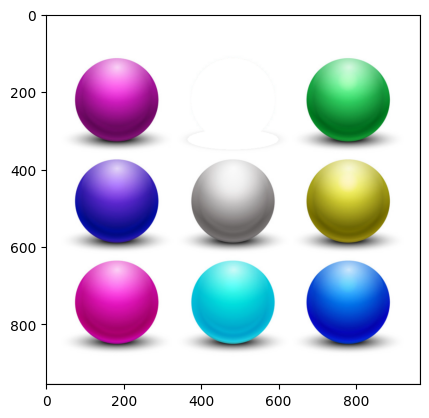

In [94]:
output = image.copy()

# For each contour, compute the average color inside the contour
for i, c in enumerate(cnts):
    # Create a mask for the current contour
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)
    # Compute mean color inside the contour using the mask
    mean_val = cv2.mean(image, mask=mask)

    # Remove the red sphere
    if mean_val[0] > 190 and mean_val[2] < 100:
        output[mask > 0] = [255, 255, 255]

plt.imshow(output)

58.947087502021766 107.38071582060583 210.1284225605952
57.76299227173863 202.1890184645287 214.6772872414272
203.15925951605075 65.42441470798956 170.11601839654256
175.919158694494 171.06868036413334 77.37122142178778
170.7456794699532 168.61182412083585 168.36832229069174
95.72352179742036 76.56093107114789 186.57443021589384
77.12506938020351 175.9968547641073 105.59361702127659
196.31047398843933 90.84716763005781 70.6150289017341
174.384234973309 70.43863379012318 164.1020035588011


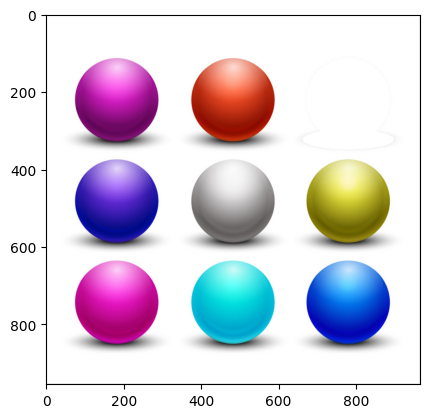

In [104]:
output = image.copy()

# For each contour, compute the average color inside the contour
for i, c in enumerate(cnts):
    # Create a mask for the current contour
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)
    # Compute mean color inside the contour using the mask
    mean_val = cv2.mean(image, mask=mask)

    print(mean_val[0], mean_val[1], mean_val[2])

    # Remove the red sphere
    if mean_val[1] > 170 and mean_val[2] > 100 and mean_val[2] < 110:
        output[mask > 0] = [255, 255, 255]

plt.imshow(output)